Det är Pichu!
[1.198909284832967, 1.2383254280858644, 1.2681346266453353, 1.4161666657198737, 1.6158985143542404] [0.7474494286009216, 0.7544443303203503, 0.8418834194529711, 1.2393849876164298, 1.3798664991644227]


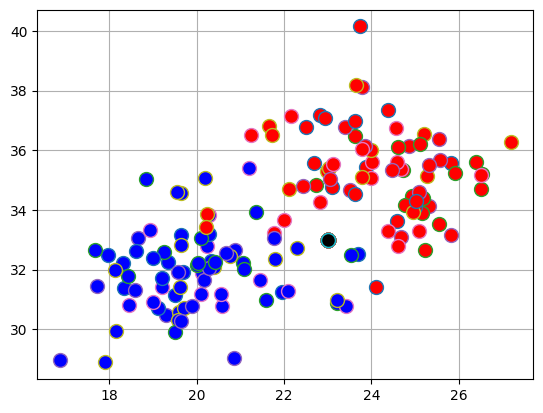

In [3]:
from distutils.log import error
from math import sqrt
import re
import string
import matplotlib.pyplot as plt
import math

with open("datapoints.txt") as f_read:
    data_points = f_read.readlines()
    data_points.pop(0)      # 'pop()' removes allocated line, i.e pop(0) removes 1st line

    pokemon_width = []      # create an empty list, we're filling it with pokemons width
    pokemon_height = []     # ==//== height
    pokemon_label = []      # ==//== label, i.e 0, 1


    # splits the text and puts them in three elements. for every row
    for line in data_points: 
        
        # Source: https://support.microsoft.com/en-us/office/eval-function-8c4a1b10-85ba-40db-b0c8-5290da4d4166
        # You can use the Eval function to evaluate an expression that results in a text string or a numeric value.
        # You can construct a string and then pass it to the Eval function as if the string were an actual expression.
        # The Eval function evaluates the string expression and returns its value. For example, Eval("1 + 1") returns 2.
        # In this case it reads the data in 'line.split(',')' and returns it as an 'int'.
        # for every split
        Width, Height, Label = [float(i) for i in line.split(',')]


        pokemon_width.append(Width)       # appends to pokemon_width
        pokemon_height.append(Height)     # appends to pokemon_height
        pokemon_label.append(Label)       # appends to pokemon_label
        

# #---------- FUNCTION FOR PLOTTING ----------#

# # Make it look nicer at a later stage. xlabels and ylabels, title etc.
# # define a new function called "pokemon_plot():"
# def pokemon_plot():
#     # 'zip()' returns a zip object. iterator where the first item in each passes iterator is paired together, and then the second etc.
#     # makes it so that every element has a corresponding width, height and label. It is needed to know which datapoints
#     # corresponds with Pichu and which datapoints that corresponds with Pikachu 
#     for (widthplot, heightplot, labelplot) in zip(pokemon_width, pokemon_height, pokemon_label):
#         # chooses the color for the pokemon. If "'labelplot' = 0": pokemon is pichu. Else it's pikachu.
#         if labelplot == 0:
#             color_of_pokemon = "Blue"
#         else:
#             color_of_pokemon = "Red"
#         # prints the actual points on the plot. changes color accordingly to the value of 'labelplot', i.e changes color
#         # according to the pokemon, pichu or pickachu.
#         plt.plot(widthplot, heightplot, 'o', markerfacecolor=color_of_pokemon, markersize = 10)
#         plt.plot(userinput_width, userinput_height, mfc='black', markersize = 10)
#     plt.grid()  # estetic. makes the plot look nicer in a grid format.

# calls upon the function
# pokemon_plot()

# Sorted 'testpoints.txt'. I found the pattern and removed the first 4 indexes.
# Removes the last index too.
# What is left is as following: '25, 32', '24.2, 31.5' etc.
# Now I can split lines at ',' and append them to two lists, x_width, y_height.

with open ("testpoints.txt", "r") as file:
    testpoints = file.readlines()
    testpoints = testpoints[1:] 
    x_width = []
    y_height = []

    for testpoints_number in testpoints:
        #'[-2]' refers to the second to last item. (25, 32) in this case -2 refers to '2'
        #'[4]' refers to the 4th item. '1. (25, 32)' in this case [4] refers to first number of '25', i.e '2'
        testpoints_number = testpoints_number[4:-2]
        #print(testpoints_number)
        # appends to 'x_width'. [0]: takes the first item in the row
        x_width.append(testpoints_number.split(", ")[0])
        # appends to 'y_height'. [1]: takes the second item in the row
        y_height.append(testpoints_number.split(", ")[1])
        # Need LC to float 

x_width = [float(i) for i in x_width]

y_height = [float(i) for i in y_height]



#--------------- ASK USER FOR INPUT ------------------#

# Starts a while loop to ask for input from the user.
# Reason being: I don't want the program to end if the user enters a value that's not accepted.
# This loop asks for the width of the pokemon.
# save the width in 'userinput_width'.
# this variable is then used in the ecludian distance calculator.
while True:
    userinput_width = input("Enter the width of the pokemon: ")
    try:
        userinput_width = float(userinput_width)
        if not 0 <= userinput_width <= 100:
            raise ValueError(f"No characters or negative number. {userinput_width} is not in a correct format.")
        break
    except ValueError as err:
        print(f"Use numbers instead of characters.")
# Starts a while loop to ask for input from the user.
# Reason being: I don't want the program to end if the user enters a value that's not accepted.
# This loop asks for the height of the pokemon.
# saves the height in 'userinput_height'.
# this variable is then used in the ecludian distance calculator.
while True:
    userinput_height = input("Enter the height of the pokemon: ")
    try:
        userinput_height = float(userinput_height)
        if not 0 <= userinput_height <= 100:
            raise ValueError(f"No characters or negative number. {userinput_height} is not in a correct format.")
        break
    except ValueError as err:
        print(f"Use numbers instead of characters.")
# plots the point the user enters, makes it black.
#plt.plot(userinput_width, userinput_height, mfc='black', markersize = 10)



# --------------------- Ecludian distance Calculator ---------------------#

dist_list = []
for width, height, label in zip(pokemon_width, pokemon_height, pokemon_label):

    distance = sqrt((userinput_width - width)**2 + (userinput_height - height)**2)

    dist_list.append([distance, label])

dist_list.sort()

#---------------------- MAJORITY DECISION ------------------#

pika_dist = []
pichu_dist = []

majority_decision = 0
for i in range(10):
    if dist_list[i][1]: # checks the sorted list lines 1-10, adds to majority decision if its equal to 1
        majority_decision += 1
        # appends the first element to pika_dist, i.e the ecludian distance. Example: '[1.198909284832967]'
        pika_dist.append(dist_list[i][0])
    else:
        # appends the first element to pichu_dist, i.e the ecludian distance. Example: '[0.7474494286009216]
        pichu_dist.append(dist_list[i][0])


if majority_decision > 5:
    print("It's a Pikachu!")
    # Informs the user of what label the closests points are
    print(f"The {majority_decision} closest points are Pikachu.")
    # When the 10 closests points are equal, i.e 5 pichu and 5 pika, this code runs.
    # I use the ecludian distance to all 10 points and sum them.
    # The userinput will be classifed to what pokemon the ecludian distance is the smallest to.
elif majority_decision == 5:
    if sum(pika_dist) > sum(pichu_dist):
        print("Det är Pichu!")
    else:
        print("Det är Pikachu!")
else:
    print("It's a Pichu!")
    # The output shows a positive value to what points are the closests to the user input.
    print(f"The {10 - majority_decision} closets points are Pichu.")





# make this a function so i don't necessarily call it. i want
# the user to enter their data, not predetermined data from 'testpoints.txt'.
def function_testpoints():
    for x1, y1 in zip (x_width, y_height):
        dist_list = []
        for width, height, label in zip(pokemon_width, pokemon_height, pokemon_label):

            distance = sqrt((x1 - width)**2 + (y1 - height)**2)
        # print((x1 - width)**2 + (y1 - height)**2)
            dist_list.append([distance, label])


        dist_list.sort()

        # if list prediction pichu or pika

        which_pokemon = dist_list[0][1]
        if which_pokemon == 0:
            print("It's a Pichu!")
        else:
            print("It's a Pikachu!")

#---------- FUNCTION FOR PLOTTING ----------#

# Make it look nicer at a later stage. xlabels and ylabels, title etc.
# define a new function called "pokemon_plot():"
def pokemon_plot():
    # 'zip()' returns a zip object. iterator where the first item in each passes iterator is paired together, and then the second etc.
    # makes it so that every element has a corresponding width, height and label. It is needed to know which datapoints
    # corresponds with Pichu and which datapoints that corresponds with Pikachu 
    for (widthplot, heightplot, labelplot) in zip(pokemon_width, pokemon_height, pokemon_label):
        # chooses the color for the pokemon. If "'labelplot' = 0": pokemon is pichu. Else it's pikachu.
        if labelplot == 0:
            color_of_pokemon = "Blue"
        else:
            color_of_pokemon = "Red"
        # prints the actual points on the plot. changes color accordingly to the value of 'labelplot', i.e changes color
        # according to the pokemon, pichu or pickachu.
        plt.plot(widthplot, heightplot, 'o', markerfacecolor=color_of_pokemon, markersize = 10)
        plt.plot(userinput_width, userinput_height, 'o', mfc='black', markersize = 10)
    plt.grid()  # estetic. makes the plot look nicer in a grid format.

print(pika_dist, pichu_dist)
pokemon_plot() #calls the plot function


In [ ]:
import random
from tokenize import Pointfloat

with open("datapoints.txt") as f_read:
    data_points = f_read.readlines()
    data_points.pop(0)      # 'pop()' removes allocated line, i.e pop(0) removes 1st line

accuracy = []
complete_data_list = []

for i in data_points:
    data_split = [] # create a new list, 'data_split'. Going to append this list to 'complete_data_list'. 
    data_points = i.split()  # splits 'data_points' so every value is a list item.
    for i in data_points:   
        data_split.append(i.strip(",")) # 'strip()' removes any leading and trailing characters. appends every split to 'data_split'.
    complete_data_list.append(data_split)   # appends the items of 'data_split' to 'complete_data_list'
    # 'complete_data_list' is now in str() format.


#print(complete_data_list)

pika_list = []   # creates a new list. we're going to store every pikachu here. if label = 1, store pikachu here.
pichu_list = []     # creates a new list. Going to store every Pichu here. If label = 0, store Pichu here.

for i in range(150):
    if complete_data_list[i][2] == "1": # considering 'complete_data_list' is in str()-format i have to compare with a str()-value, i.e '"1"' 
        pika_list.append(complete_data_list[i]) # fills 'pika_list' list with all of the pikachu values.
    else:
        pichu_list.append(complete_data_list[i])    # fills 'pichu_list' list with all of the Pichu values.
#print(pichu_list)

print(f"This is pika_list: {pika_list}")
#------------------ create test_list of 50. 25 should be pikachu, 25 should be pichu ------------------#
for i in pika_list:
    pika_list_test_points = random.sample(pika_list, k = 25)
    pika_list_test_points.sort()
    for point in pika_list_test_points:
        pika_list.remove(point)
print(f"this is pikachu random {pika_list_test_points}")
print(f"This is pika list: {pika_list}")
        

In [88]:
import random
from tokenize import Pointfloat

with open("datapoints.txt") as f_read:
    data_points = f_read.readlines()
    data_points.pop(0)      # 'pop()' removes allocated line, i.e pop(0) removes 1st line

accuracy = []
complete_data_list = []

for i in data_points:
    data_split = [] # create a new list, 'data_split'. Going to append this list to 'complete_data_list'. 
    data_points = i.split()  # splits 'data_points' so every value is a list item.
    for i in data_points:   
        data_split.append(i.strip(",")) # 'strip()' removes any leading and trailing characters. appends every split to 'data_split'.
    complete_data_list.append(data_split)   # appends the items of 'data_split' to 'complete_data_list'
    # 'complete_data_list' is now in str() format.


#print(complete_data_list)

pika_list = []   # creates a new list. we're going to store every pikachu here. if label = 1, store pikachu here.
pichu_list = []     # creates a new list. Going to store every Pichu here. If label = 0, store Pichu here.

for i in range(150):
    if complete_data_list[i][2] == "1": # considering 'complete_data_list' is in str()-format i have to compare with a str()-value, i.e '"1"' 
        pika_list.append(complete_data_list[i]) # fills 'pika_list' list with all of the pikachu values.
    else:
        pichu_list.append(complete_data_list[i])    # fills 'pichu_list' list with all of the Pichu values.
#print(pichu_list)

#print(f"This is pika_list: {pika_list}")
#------------------ create test_list of 50. 25 should be pikachu, 25 should be pichu ------------------#
pikachus_data_points = [i for i in range(75)]
pika_list_test_points = random.sample(pika_list, k = 25)
pika_list_test_points.sort()
for point in pika_list_test_points:
    pika_list.remove(point)
#print(f"this is pikachu random {pika_list_test_points}")
#print(f"This is pika list: {pika_list}")


pichus_data_points = [i for i in range(75)]
pichu_list_test_points = random.sample(pichu_list, k = 25)
pichu_list_test_points.sort()
for point in pichu_list_test_points:
    pichu_list.remove(point)








number_of_elements_pika_test_random = len(pika_list_test_points)
number_of_elements_pika_list = len(pika_list)
print("Elements in list Pika_list: ", number_of_elements_pika_list)
print("Elements in 'pika_list_test_points': ", number_of_elements_pika_test_random)


number_of_elements_pichu_test_random = len(pichu_list_test_points)
number_of_elements_pichu_list = len(pichu_list)
print("Elements in Pichu_list:", number_of_elements_pichu_list)
print("Elements in pika_list_test_points: ", number_of_elements_pichu_test_random)

Elements in list Pika_list:  50
Elements in 'pika_list_test_points':  25
Elements in Pichu_list: 50
Elements in pika_list_test_points:  25
